In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None) 
params = {'figure.figsize': (8, 5)}
plt.rcParams.update(params)

### Reading data files

In [2]:
df = pd.read_csv('ml_case_training_data.csv')
df_hist = pd.read_csv('ml_case_training_hist_data.csv')
df_output = pd.read_csv('ml_case_training_output.csv')

### Exploring datasets

In [3]:
df.shape

(16096, 32)

In [4]:
df.isna().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [5]:
df_hist.shape

(193002, 8)

In [6]:
df_hist.isna().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [7]:
df_output.shape

(16096, 2)

In [8]:
df_output.isna().sum()

id       0
churn    0
dtype: int64

In [9]:
df_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [10]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
df_hist['price_date'] = pd.to_datetime(df_hist['price_date'])

In [12]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            193002 non-null  object        
 1   price_date    193002 non-null  datetime64[ns]
 2   price_p1_var  191643 non-null  float64       
 3   price_p2_var  191643 non-null  float64       
 4   price_p3_var  191643 non-null  float64       
 5   price_p1_fix  191643 non-null  float64       
 6   price_p2_fix  191643 non-null  float64       
 7   price_p3_fix  191643 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


### Finding average price for each customer

In [13]:
df_hist = df_hist.groupby('id').mean()

In [14]:
df_hist.head()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


## Merging all three datasets to one 

In [15]:
df = pd.merge(df, df_hist,  on = 'id').merge(df_output, on = 'id')

In [16]:
df.shape

(16096, 39)

In [17]:
df.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.122856,0.102137,0.072579,40.640023,24.384011,16.256008,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149934,0.000000,0.000000,44.315416,0.000000,0.000000,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0


In [18]:
df.isna().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

#### Removing columns that won't help with modeling

In [19]:
df.drop(columns = ['campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele',
                  'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'activity_new'],
       inplace = True)

In [20]:
df.has_gas = np.where(df.has_gas == 't', 1 , 0)

### Filling Missing values

In [21]:
df['channel_sales'].fillna('Unknown', inplace = True)
df['origin_up'].fillna('Unknown', inplace = True)

In [22]:
df.fillna(df.mean(), inplace = True)

In [23]:
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_modif_prod'] = pd.to_datetime(df['date_modif_prod'])
df['date_renewal'] = pd.to_datetime(df['date_renewal'])
df['date_end'] = pd.to_datetime(df['date_end'])

In [24]:
df['date_activ'] = pd.DatetimeIndex(df['date_activ']).month
df['date_modif_prod'] = pd.DatetimeIndex(df['date_modif_prod']).month
df['date_renewal'] = pd.DatetimeIndex(df['date_renewal']).month
df['date_end'] = pd.DatetimeIndex(df['date_end']).month

In [25]:
date_end_mode = df['date_end'].mode()[0]
date_modif_prod_mode = df['date_modif_prod'].mode()[0]
date_renewal_mode = df['date_renewal'].mode()[0]

In [26]:
df['date_end'] = df['date_end'].fillna(date_end_mode)
df['date_modif_prod'] = df['date_modif_prod'].fillna(date_modif_prod_mode)
df['date_renewal'] = df['date_renewal'].fillna(date_renewal_mode)

### Visualizations

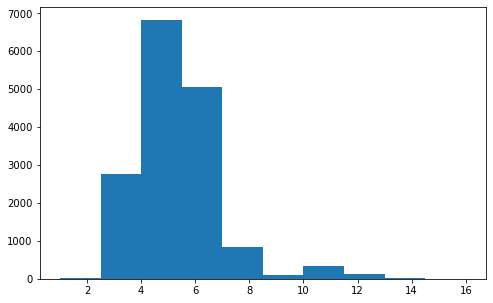

In [27]:
df.num_years_antig.hist(grid = False)

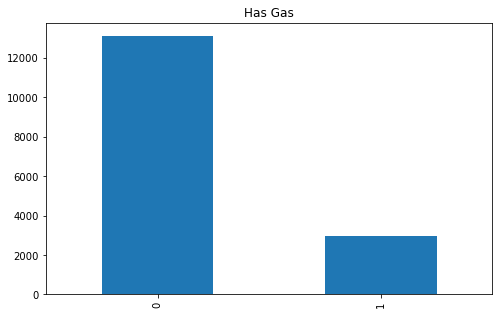

In [28]:
df.has_gas.value_counts().plot(kind = 'bar', title = 'Has Gas')

In [29]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,11,11.0,11.0,11.0,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6,6.0,11.0,6.0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.122856,0.102137,0.072579,40.640023,24.384011,16.256008,1
2,d29c2c54acc38ff3c0614d0a653813dd,Unknown,4660,0,0,8,8.0,8.0,8.0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149934,0.000000,0.000000,44.315416,0.000000,0.000000,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4,4.0,4.0,4.0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3,3.0,3.0,3.0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0


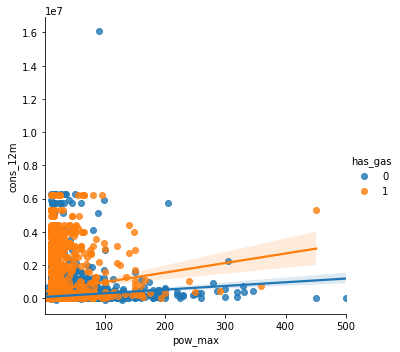

In [30]:
sns.lmplot(data = df, x = 'pow_max', y = 'cons_12m', hue = 'has_gas')

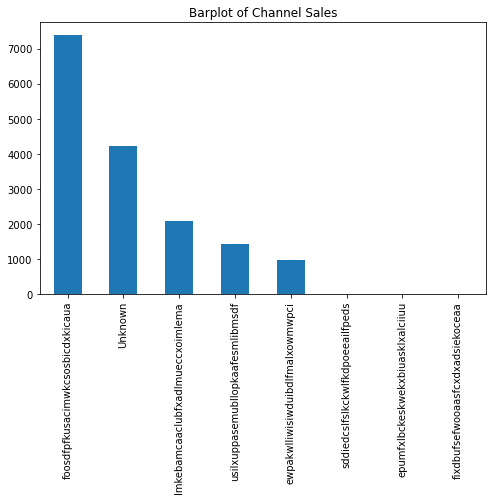

In [31]:
df.channel_sales.value_counts().plot(kind = 'bar', title = 'Barplot of Channel Sales')

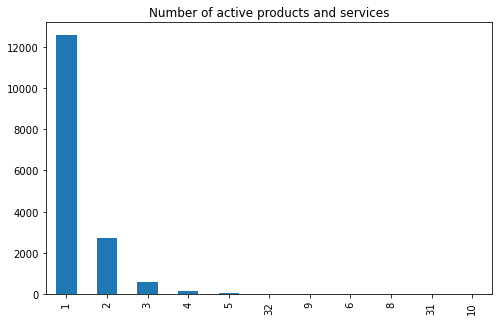

In [32]:
df.nb_prod_act.value_counts().plot(kind = 'bar', title = 'Number of active products and services')

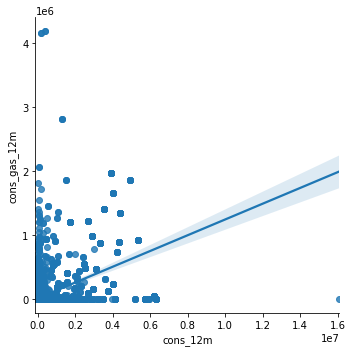

In [33]:
sns.lmplot(data = df, x = 'cons_12m', y = 'cons_gas_12m')

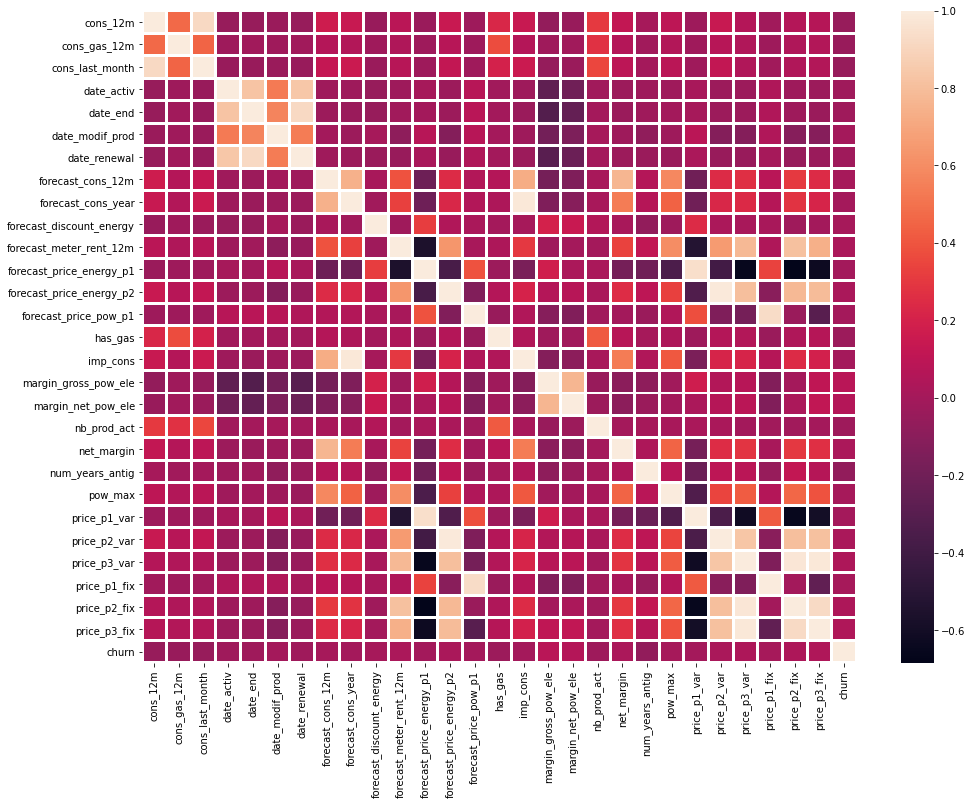

In [34]:
corr = df.corr()
f, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, linewidths = 2)

In [35]:
df.to_pickle('data.pkl')